In [1]:
#export PATH=$PATH:/Users/lorenzoschena/Desktop/Workspace/openfast/install/bin
from real_fast_interactor import RFInteractor

rfi = RFInteractor(ZmqInAddress='tcp://127.0.0.1:5555',
                   ZmqOutAddress='tcp://127.0.0.1:5557', verbose=False, save_comms_log=True, path_out='./zmq_logs/', 
                   live_plot=False, name='OFZMQ_test04')

ZMQ Real Time interactor for FAST initialized. 
 PUB-SUB protocol: tcp://127.0.0.1:5557 | REQ-REP protocol: tcp://127.0.0.1:5555
Communication log will be saved at: ./zmq_logs/ 



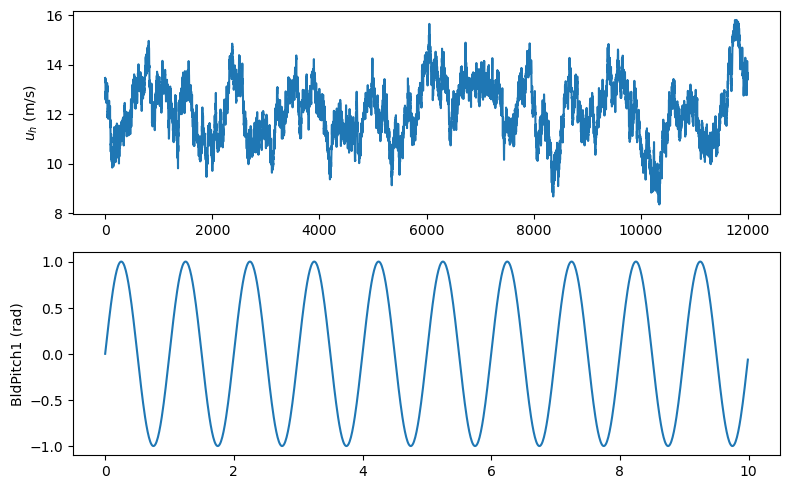

In [2]:
from pyFAST.input_output import FASTOutputFile
import numpy as np 
import matplotlib.pyplot as plt 


t = np.linspace(0, 100, 400)

wind_series = FASTOutputFile('./ex_files/tsim.dat').toDataFrame()['U_[3.40]']

frequency = 1.0  # 1 Hz sinusoidal signal
sampling_rate = 100.0  # Sampling rate of 100 Hz
duration = 10.0  # Duration of the signal
t = np.arange(0, duration, 1 / sampling_rate)  # Time vector
bld_pitch = np.sin(2 * np.pi * frequency * t)  # Example for another series

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].plot(wind_series)
axs[0].set_ylabel('$u_h$ (m/s)')

axs[1].plot(t, bld_pitch)
axs[1].set_ylabel('BldPitch1 (rad)')

fig.tight_layout()

In [3]:
import time 

count_sampling = 0
dt_in = 0.5 
dt_wspd = 0.05 

done = False
rfi.cont_req_threshold = 5
# rfi.fast_sub(100, True)
# bld pitch staircase example signal from 0 to 15 degrees 
pitch = 0
while not done:
    
    if count_sampling >= 1000:
        count_sampling = 0   
     
    rep = {
        'VelH': wind_series[count_sampling], 
        'VelV': 0,
        'BlPitchCom1': count_sampling // 1000 * 0.1,
        }
           
    done = rfi.zmq_full_communication(rep, True)
    count_sampling += 1
    
    
    
# import threading

# t1 = threading.Thread(target=subscriber, args=(True,))
# t2 = threading.Thread(target=replier, args=())

# t1.start()
# t2.start()

# t1.join()
# t2.join()

Response sent: 13.459;0;0.0;
Response sent: 12.114;0;0.0;
Response sent: 11.085;0;0.1;
Response sent: 10.177;0;0.1;
Response sent: 10.805;0;0.2;
Response sent: 10.215;0;0.2;
Response sent: 11.486;0;0.30000000000000004;
Response sent: 11.311;0;0.30000000000000004;
Response sent: 11.266;0;0.4;
Response sent: 11.805;0;0.4;
Response sent: 12.994;0;0.5;
Response sent: 12.649;0;0.5;
Response sent: 13.242;0;0.6000000000000001;
Response sent: 13.065;0;0.6000000000000001;
Response sent: 12.925;0;0.7000000000000001;
Response sent: 14.099;0;0.7000000000000001;
Response sent: 14.393;0;0.8;
Response sent: 13.228;0;0.8;
Response sent: 11.834;0;0.9;
Response sent: 13.468;0;0.9;
Response sent: 12.941;0;0.0;
Response sent: 11.981;0;0.0;
Response sent: 10.435;0;0.1;
Response sent: 11.239;0;0.1;
Response sent: 11.445;0;0.2;
Response sent: 11.087;0;0.2;
Response sent: 11.424;0;0.30000000000000004;
Response sent: 11.828;0;0.30000000000000004;
Response sent: 11.464;0;0.4;
Response sent: 12.099;0;0.4;
Respon

In [4]:
from openfast_toolbox.io import FASTOutputFile

fastout = FASTOutputFile('../templatesDir/OFZMQ_test04/OFZMQ_test04.outb').toDataFrame()

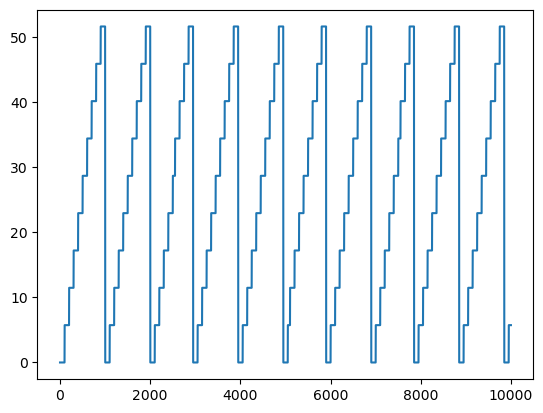

In [5]:
plt.plot(fastout['BlPitchC1_[deg]'])

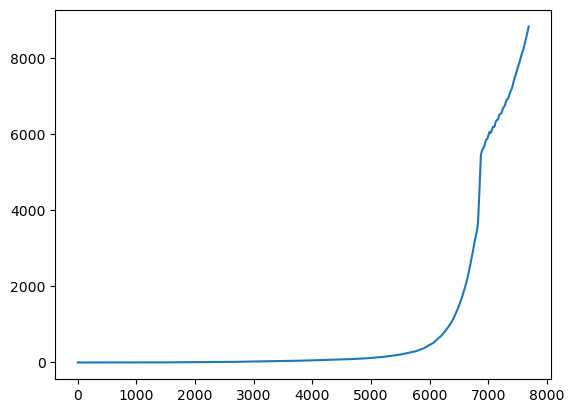

In [8]:
plt.plot(rfi.sub_dict[' GenPwr_(kW)'])